In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load combined dataset
df = pd.read_csv('../data/combined_dataset.csv')

# Encode categorical features
df['protocol_code'] = df['protocol'].map({'TCP': 0, 'UDP': 1, 'HTTP': 2, 'UNKNOWN': 3})
df['network_code'] = df['network'].map({'good': 0, 'medium': 1, 'poor': 2, 'unstable': 3})

# Encode labels
df['label_code'] = df['label'].map({'reel': 1, 'non-reel': 0})

# Prepare features and labels
X = df[['packet_size', 'duration', 'protocol_code', 'network_code']]
y = df['label_code']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Initialize and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['non-reel', 'reel']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation for robustness
scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print("Cross-validated F1 macro scores:", scores)
print("Average F1 score:", scores.mean())

# Save the trained model
joblib.dump(model, '../src/reel_detector_model.pkl')
print("Model saved as ../src/reel_detector_model.pkl")


Classification Report:
               precision    recall  f1-score   support

    non-reel       1.00      1.00      1.00     13956
        reel       1.00      1.00      1.00      7101

    accuracy                           1.00     21057
   macro avg       1.00      1.00      1.00     21057
weighted avg       1.00      1.00      1.00     21057

Confusion Matrix:
 [[13956     0]
 [    4  7097]]
Cross-validated F1 macro scores: [0.92591746 1.         1.         1.         1.        ]
Average F1 score: 0.9851834925110786
Model saved as ../src/reel_detector_model.pkl


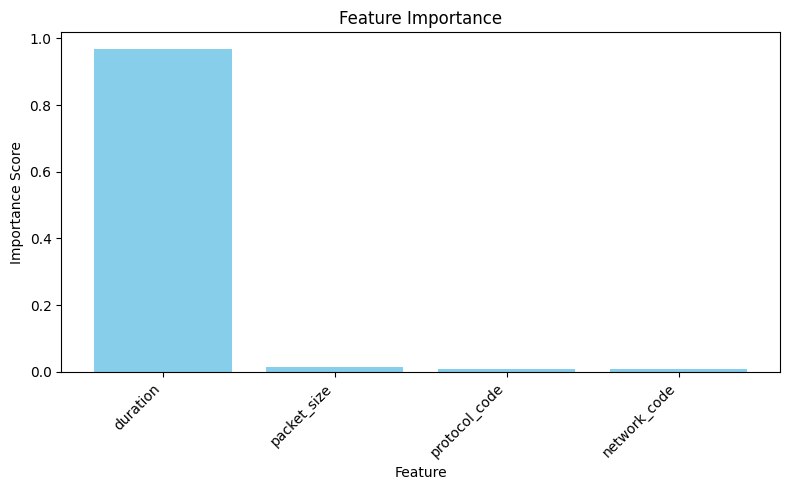

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
importances = model.feature_importances_

# Get feature names from your training features
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importance bar chart
plt.figure(figsize=(8, 5))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align='center', color='skyblue')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
